In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle

from pic.functions import smooth
from pic.constantes import me

In [23]:
def meanfield(key,data):
    ks = [k for k in data.keys()]
    
    vect = data[ks[0]][key]
    for k in ks[int(len(ks)*2/3):]:
        vect += data[k][key]
    vect /= len(ks)
    
    return vect[:-2]

In [24]:
data = pickle.load(open("Data_2.dat","rb"))

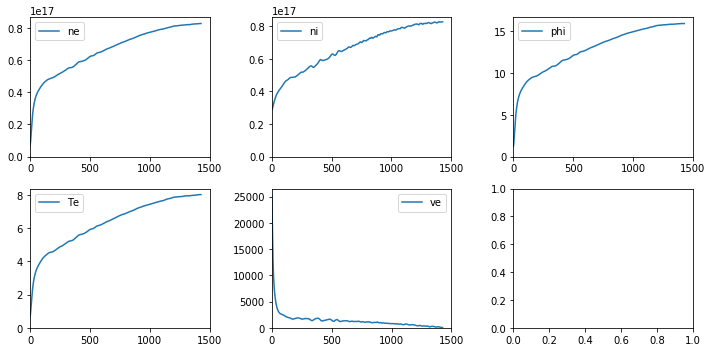

In [25]:
keys = ['ne','ni',"phi",
       'Te','ve']

Nlines = 2
Ncol = int(len(keys)/2)+1
fig, axarr = plt.subplots(Nlines,Ncol, figsize=(10,5))

for key,ax in zip(keys, axarr.flatten()):
    vect = meanfield(key,data)
    ax.plot(abs(smooth(vect)), label = key)
    ax.legend()
    ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=0)
plt.tight_layout()

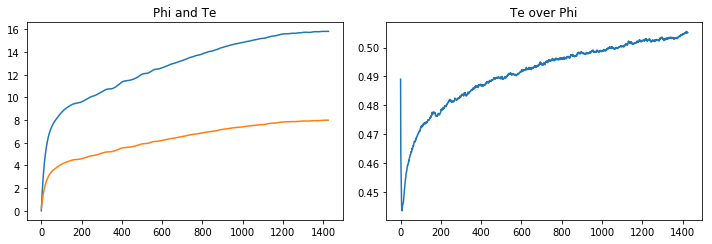

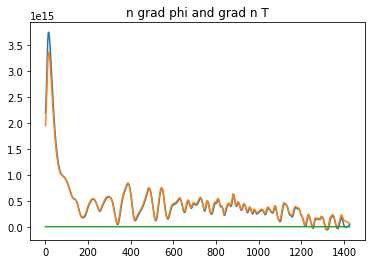

In [36]:
Te = meanfield("Te",data)
phi = meanfield("phi",data)
ne = meanfield("ne",data)


plt.figure(figsize=(10,3.5))
plt.subplot(121)
plt.plot(phi)
plt.plot(Te)
plt.title("Phi and Te")
plt.subplot(122)
plt.plot(Te/(phi[1:]))
plt.title("Te over Phi")

plt.tight_layout()

plt.show()

ve = meanfield("ve",data)

nT = ne[:-1]*Te
plt.plot(smooth(ne*np.gradient(phi)))
plt.plot(smooth(np.gradient(nT)))
#plt.plot(smooth(np.gradient(me*ne[:-1]*ve**2)))
plt.title("n grad phi and grad n T")
print("")

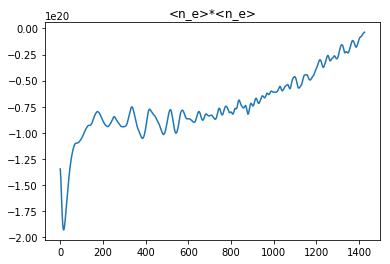

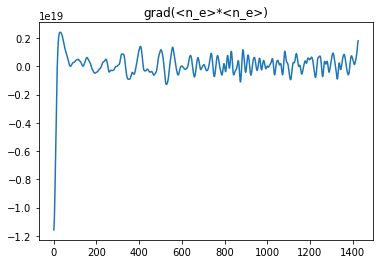

In [38]:
ve = meanfield("ve",data)

plt.title("<n_e>*<n_e>")
plt.plot(smooth(ve*ne[:-1]))
plt.show()

plt.title("grad(<n_e>*<n_e>)")
plt.plot(smooth(np.gradient(ve*ne[:-1])))
